In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

In [15]:
sample_size = 100
theta_true = 13
np.random.seed(42)
data = np.random.randint(theta_true, 2 * theta_true, sample_size)
theta_estimate = 2 / 3 * (np.sum(data) / sample_size)
alpha = 0.05

In [17]:
def calculate_exact_interval(data, alpha):
    N = len(data)
    left = round(np.max(data) / (1 + (1 - alpha / 2) ** (1 / N)), 3)
    right = round(np.max(data) / (1 + (alpha / 2) ** (1 / N)), 3)
    return left, right

left_exact, right_exact = calculate_exact_interval(data, alpha)
print("Точный интервал: ", "[", left_exact, ',', right_exact, ']')
print("Размах = ", round(right_exact - left_exact, 3))

Точный интервал:  [ 12.502 , 12.731 ]
Размах =  0.229


In [19]:
def calculate_asymptotic_interval(data, alpha):
    N = len(data)
    squared_data = data ** 2
    std_dev = np.sqrt(0.01 * np.sum(squared_data) - (0.01 * np.sum(data)) ** 2)
    margin = 1.96 * (2 / 3) / 10 * std_dev
    left = round(theta_estimate - margin, 3)
    right = round(theta_estimate + margin, 3)
    return left, right

left_asymptotic, right_asymptotic = calculate_asymptotic_interval(data, alpha)
print("Асимптотический интервал: [", left_asymptotic, ', ', right_asymptotic, ']')
print("Размах = ", round(right_asymptotic - left_asymptotic, 3))

Асимптотический интервал: [ 12.375 ,  13.319 ]
Размах =  0.944


In [21]:
def calculate_bootstrap_interval(data, alpha, num_samples=1000):
    bootstrap_estimates = np.array([])
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_estimates = np.append(bootstrap_estimates, 2 / 3 * np.mean(sample) - 2 / 3 * np.mean(data))
    
    bootstrap_estimates = np.sort(bootstrap_estimates)
    left = round(2 / 3 * np.mean(data) + bootstrap_estimates[24], 3)
    right = round(2 / 3 * np.mean(data) + bootstrap_estimates[974], 3)
    return left, right

left_bootstrap, right_bootstrap = calculate_bootstrap_interval(data, alpha)
print("Бутстраповский интервал: [", left_bootstrap, ', ', right_bootstrap, ']')
print("Размах = ", round(right_bootstrap - left_bootstrap, 3))

Бутстраповский интервал: [ 12.353 ,  13.307 ]
Размах =  0.954


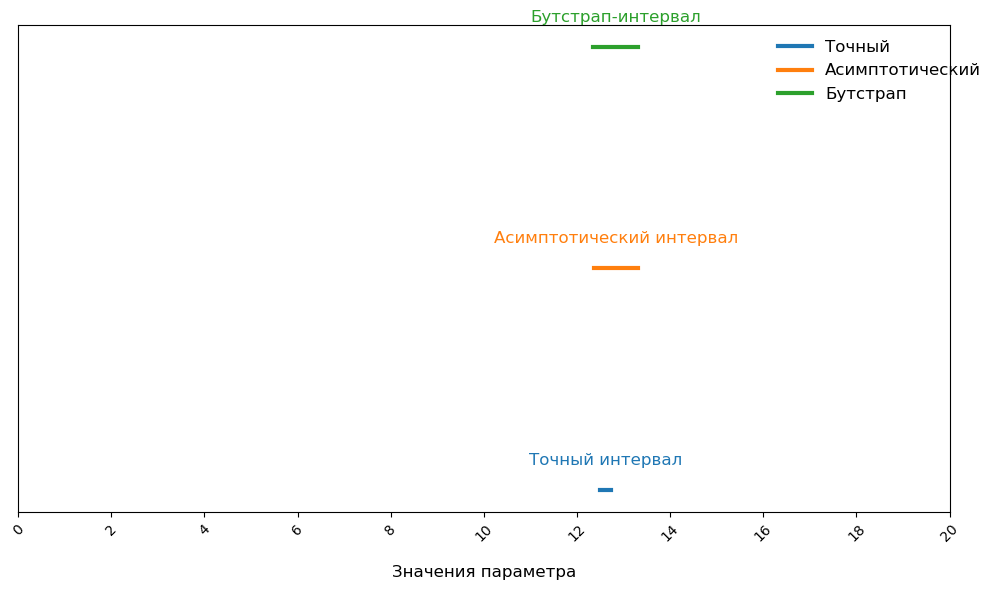

In [23]:
def plot_intervals(left_exact, right_exact, left_asymptotic, right_asymptotic, left_bootstrap, right_bootstrap):
    x_exact = np.linspace(left_exact, right_exact, 100)
    y_exact = [1] * 100

    x_asymptotic = np.linspace(left_asymptotic, right_asymptotic, 100)
    y_asymptotic = [2] * 100

    x_bootstrap = np.linspace(left_bootstrap, right_bootstrap, 100)
    y_bootstrap = [3] * 100

    plt.figure(figsize=(10, 6))
    plt.xlim(min(left_exact, left_asymptotic, left_bootstrap), max(right_exact, right_asymptotic, right_bootstrap))
    
    plt.plot(x_exact, y_exact, color='#1f77b4', linewidth=3, label="Точный")
    plt.plot(x_asymptotic, y_asymptotic, color='#ff7f0e', linewidth=3, label="Асимптотический")
    plt.plot(x_bootstrap, y_bootstrap, color='#2ca02c', linewidth=3, label="Бутстрап")

    plt.xticks(np.arange(0, 21, 2), fontsize=10, rotation=45)
    plt.xlabel('Значения параметра', fontsize=12, labelpad=15)
    plt.yticks([])
    plt.axis('on')

    plt.text(np.mean(x_exact), 1.1, "Точный интервал", ha='center', va='bottom', color='#1f77b4', fontsize=12)
    plt.text(np.mean(x_asymptotic), 2.1, "Асимптотический интервал", ha='center', va='bottom', color='#ff7f0e', fontsize=12)
    plt.text(np.mean(x_bootstrap), 3.1, "Бутстрап-интервал", ha='center', va='bottom', color='#2ca02c', fontsize=12)

    plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=12, frameon=False)
    plt.tight_layout()
    plt.show()

plot_intervals(left_exact, right_exact, left_asymptotic, right_asymptotic, left_bootstrap, right_bootstrap)